# EXPLORATORY DATA ANALYSIS: Dataset sis_rec (sistema de recomendación)

Antes de comenzar a hacer el análisis exploratorio, se sabe a priori que el sistema de recomendación de películas estará basado en CONTENIDO. Esto se debe a que, si bien tenemos información respecto al score o popularidad de las películas, no se tiene información relacionada a los usuarios que realizaron tales valoraciones y tampoco se tiene información acerca de las preferencias del usuario que hará la consulta. Por lo tanto, el sistema de recomendación tendrá que utilizar datos como género, directores, etc. 

A continuación, se presenta una exploración a los datos que podrían utilizarse para construir el sistema de recomendación:

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools
import collections



## Columnas y tamaño del datasets

In [2]:
# Dataset sis_rec (sistema de recomendación, generado en el ETL)
df_sr = pd.read_csv('sis_rec_RMCE.csv')
df_sr.head()

,overview,title,release_year,genres_list,directors,production,country,collection
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,1995.0,"['Animation', 'Comedy', 'Family']",['John Lasseter'],['Pixar Animation Studios'],['United States of America'],Toy Story Collection
1,When siblings Judy and Peter discover an encha...,Jumanji,1995.0,"['Adventure', 'Fantasy', 'Family']",['Joe Johnston'],"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],NaN
2,A family wedding reignites the ancient feud be...,Grumpier Old Men,1995.0,"['Romance', 'Comedy']",['Howard Deutch'],"['Warner Bros.', 'Lancaster Gate']",['United States of America'],Grumpy Old Men Collection
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,1995.0,"['Comedy', 'Drama', 'Romance']",['Forest Whitaker'],['Twentieth Century Fox Film Corporation'],['United States of America'],NaN
4,Just when George Banks has recovered from his ...,Father of the Bride Part II,1995.0,['Comedy'],['Charles Shyer'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],Father of the Bride Collection


In [3]:
# Tipos de datos
df_sr.dtypes


overview         object
title            object
release_year    float64
genres_list      object
directors        object
production       object
country          object
collection       object
dtype: object

## Hacer legibles los campos con listas

In [3]:
#--------- Las columnas 'genres' y 'crew' contienen listas de diccionarios: ---------
columna_list_variables= ['genres_list','directors','production','country']
for columna_list in columna_list_variables:
    df_sr[columna_list] = df_sr[columna_list].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

In [7]:
df_sr.head()

,overview,title,release_year,genres_list,directors,production,country,collection
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story,1995.0,"[Animation, Comedy, Family]",[John Lasseter],[Pixar Animation Studios],[United States of America],Toy Story Collection
1,When siblings Judy and Peter discover an encha...,Jumanji,1995.0,"[Adventure, Fantasy, Family]",[Joe Johnston],"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],NaN
2,A family wedding reignites the ancient feud be...,Grumpier Old Men,1995.0,"[Romance, Comedy]",[Howard Deutch],"[Warner Bros., Lancaster Gate]",[United States of America],Grumpy Old Men Collection
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,1995.0,"[Comedy, Drama, Romance]",[Forest Whitaker],[Twentieth Century Fox Film Corporation],[United States of America],NaN
4,Just when George Banks has recovered from his ...,Father of the Bride Part II,1995.0,[Comedy],[Charles Shyer],"[Sandollar Productions, Touchstone Pictures]",[United States of America],Father of the Bride Collection


## Exploración de la variedad de géneros y sus frecuencias:
Aunque mayoría de las películas en el dataset pertenecen a los géneros de drama y comedia, se observa que  podría  haber suficientes películas catalogadas con otros géneros para construir un modelo a partir de esta información.

Existen 20 géneros diferentes en el dataset, y sus frecuencias son las siguientes: 


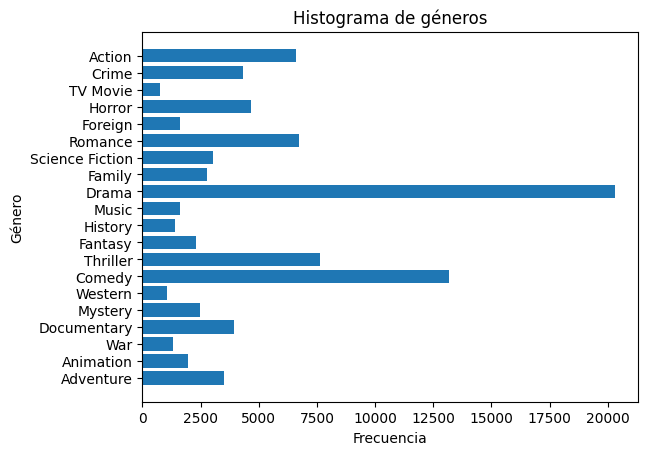

In [8]:
# Combina todos los valores de la lista de géneros en una sola cadena
combined_list = list(itertools.chain.from_iterable(df_sr['genres_list']))

# Obtiene los valores únicos de la lista combined_list
valores_unicos = set(combined_list)

# Calcula la frecuenca de cada género en la lista combined_list
frecuencia_valores = collections.Counter(combined_list)

# Prepara los datos para el histograma
valores = list(valores_unicos)
frecuencias = [frecuencia_valores[valor] for valor in valores]

# Mensaje para mostrar:
print('Existen', len(valores_unicos), 'géneros diferentes en el dataset, y sus frecuencias son las siguientes: ')

# Instrucciones para desplegar el histograma
plt.barh(valores, frecuencias)
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Histograma de géneros')
plt.show()

## Exploración de la diversidad de años de lanzamiento y sus frecuencias:
El año de estreno o lanzamiento podría ser una característica importante para un sistema de recomendación, ya que el estilo de las mismas va cambiando con el tiempo. Se observa que las películas del dataset tienen fechas de lanzamiento que van de 1874 a 2020. Evidentemente la mayoría de las películas en el dataset se estrenaron en las últimas dos décadas y aquellas lanzadas antes de la década de 1930 son casos raros.

Los años de lanzamiento de las películas en el dataset van desde 1874 hasta 2020 
El número de películas estrenadas por década es el siguiente:


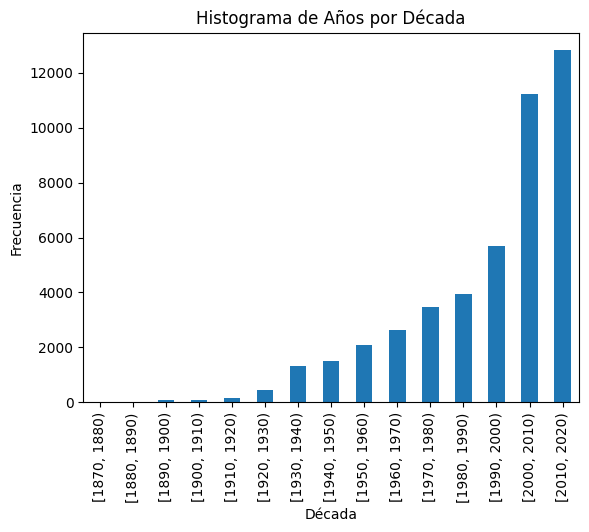

In [9]:
# Agrupa los años en décadas
decada = pd.cut(df_sr['release_year'], bins=range(1870, 2030, 10), right=False)

# Calcula la frecuencia de cada década
decade_counts = decada.value_counts().sort_index()

# Mensaje para mostrar:
print('Los años de lanzamiento de las películas en el dataset van desde', int(df_sr['release_year'].min()), 'hasta', int(df_sr['release_year'].max()),'\nEl número de películas estrenadas por década es el siguiente:')

# Gráfica el histograma
decade_counts.plot.bar()
plt.xlabel('Década')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años por Década')
plt.show()

## Exploración de la variedad de directores:
Cerca de 800 películas no tienen información respecto a su director. Existen 19712 directores diferentes en el dataset y 45451 películas. Aunque en la nube de palabras se resaltan los nombres de los directores con mayor número de películas dirigidas, en realidad, no hay una diferencia significativa entre los 20 directores con más películas.

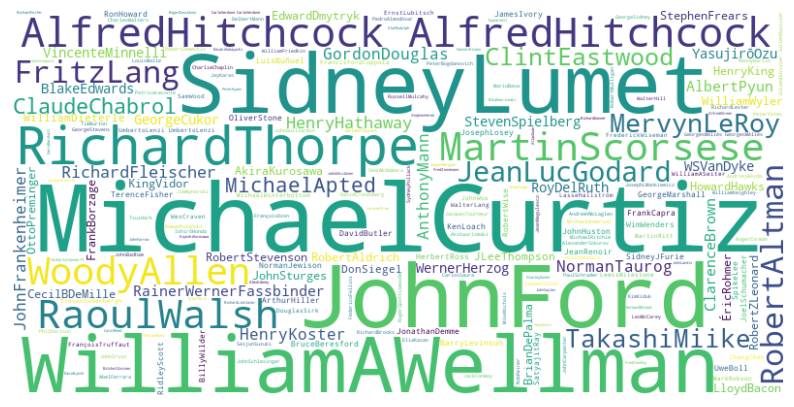

In [10]:
# Se convierten los valores de la columna directors de listas a cadenas de texto
directores_str = df_sr['directors'].apply(lambda x: ' '.join(x))

# Se elimina espacios, guines y puntos entre el nombre y el apellido para que se consideren una sola palabra en la nube de palabras
directores_str = directores_str.str.replace(' ','')
directores_str = directores_str.str.replace('-','')
directores_str = directores_str.str.replace('.','')

# Concatena todos los textos en un solo string
text = ' '.join(directores_str)

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [63]:
# Combina todos los valores de la lista de géneros en una sola cadena
combined_list = list(itertools.chain.from_iterable(df_sr['directors']))

# Obtiene los valores únicos de la lista combined_list
valores_unicos = set(combined_list)

# Calcula la frecuenca de cada género en la lista combined_list
frecuencia_valores = collections.Counter(combined_list)

# Mensaje:
print('Existen', len(valores_unicos), 'directores diferentes en el dataset y',len(df_sr),'películas')

# Determina cuáles son los 20 directores con mayor número de películas dirigidas:
frecuencias = df_sr['directors'].value_counts().head(20)

# Mensaje:
print('Los 20 directores con mayor número de películas dirigidas son:')
print(frecuencias)

Existen 19712 directores diferentes en el dataset y 45451 películas
Los 20 directores con mayor número de películas dirigidas son:
directors
[]                      835
[John Ford]              63
[Michael Curtiz]         61
[Werner Herzog]          52
[Alfred Hitchcock]       52
[Georges Méliès]         51
[Woody Allen]            47
[Sidney Lumet]           45
[Charlie Chaplin]        43
[William A. Wellman]     41
[Henry Hathaway]         41
[Richard Thorpe]         40
[Ingmar Bergman]         39
[George Cukor]           39
[Raoul Walsh]            38
[Fritz Lang]             37
[Martin Scorsese]        37
[Robert Altman]          36
[Takashi Miike]          36
[John Huston]            36
Name: count, dtype: int64


## Exploración del campo "overview"
Este campo tiene las sinopsis de las películas. Casi la totalidad de las películas cuentan con sinopsis. Las palabras encontradas en la nube de palabras concuerdan con los géneros más frecuentes del dataset (drama y comedia). Si se entrenara el modelo para el sistema de recomendación con estas palabras, probablemente no arrojaría resultados muy precisos ya que las palabras son muy genéricas. Por ejemplo, la palabra más frecuente "life" no describe una temática en particular... igual podría tratarse de una película de terror que de una comedia romántica o una película de super héroes.

In [11]:
# Cuenta el número de películas que no tienen sinopsis
nulos = df_sr['overview'].isna().sum()
nulos_porc = nulos/len(df_sr)*100
print('El', round(nulos_porc,2), 'por ciento de las películas no tienen sinopsis')

El 2.07 por ciento de las películas no tienen sinopsis


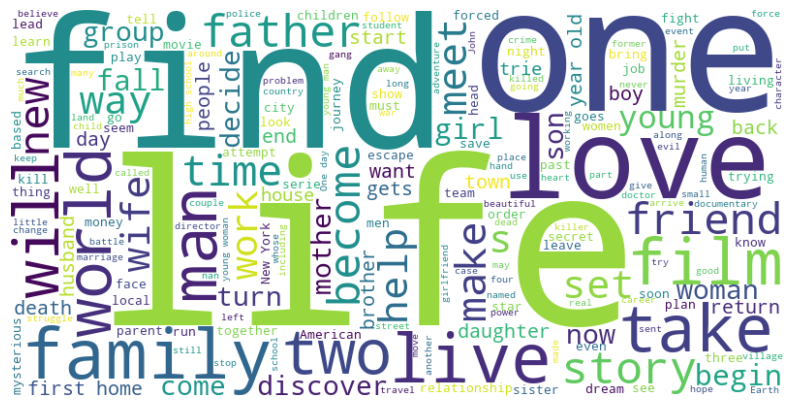

In [12]:
# Genera nube de palabras a partir de la columna overview

# Se convierten los valores de la columna overview a cadenas de texto
sinopsis_str = [str(item) for item in df_sr['overview']]

# Concatena todos los textos en un solo string
text = ' '.join(sinopsis_str)

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Exploración del campo "collection"
Evidentemente las películas que pertenecen a una misma colección son muy similares y deberían recomendarse por el sistema si es el caso. Por lo tanto, aún cuando solo cerca del 10% de las películas del dataset pertenecen a una colección, se considera relevante incluir esta variable en el sistema de recomendación.

In [13]:
colecciones = df_sr['collection']
nulos = colecciones.isna().sum()
nulos_porc = nulos/len(df_sr)*100
print('El', round(nulos_porc,2),'por ciento de las películas no pertenecen a una colección')

El 90.11 por ciento de las películas no pertenecen a una colección


## Exploración del campo 'title'
Algunas palabras de los títulos parecen coincidir con los géneros predominantes del data set, pero otras no son representativas y son muy genéricas. Por ejemplo, la palabra "man" podría estar en un título de cualquier tema, género, año, etc., es decir, no provee información relevante para el sistema de recomendación.

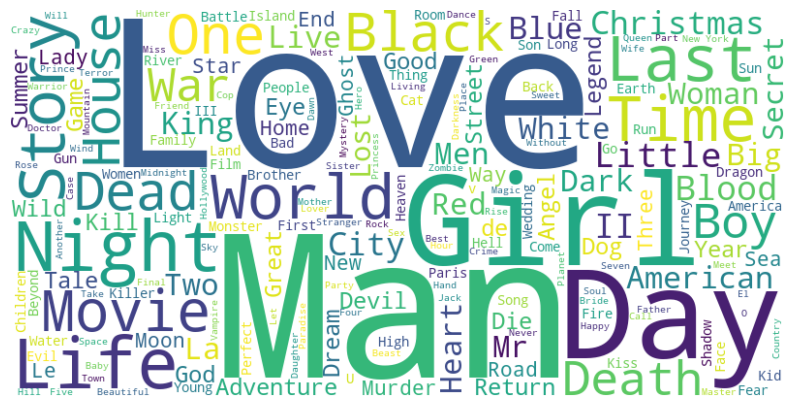

In [14]:
# Genera nube de palabras a partir de la columna title

# Se convierten los valores de la columna overview a cadenas de texto
titulos = [str(item) for item in df_sr['title']]

# Concatena todos los textos en un solo string
text = ' '.join(titulos)

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Exploración del campo 'production'
Por lo general las casas productoras crean todas las películas de una colección o "universo" de películas, por lo cual podría ser relevante para el sistema de recomendación. Se observa que algunas veces, el nombre de la casa productora aparece varias veces escrita de distintas formas(por ejemplo Metro Goldwyn Mayer/MGM/MGM Metro Goldwyn Mayer). Evidentemente las casas productoras más famosas son las que presentan mayor frecuencia.

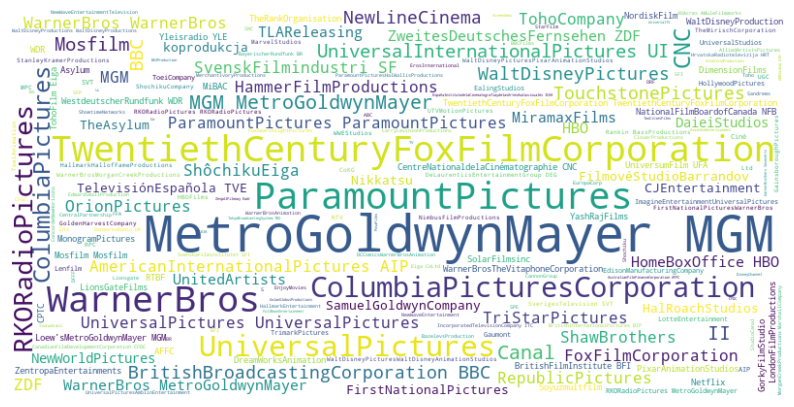

In [15]:
# Se convierten los valores de la columna directors de listas a cadenas de texto
productoras = df_sr['production'].apply(lambda x: ' '.join(x))

# Se elimina espacios, guines y puntos entre el nombre y el apellido para que se consideren una sola palabra en la nube de palabras
productoras = productoras.str.replace(' ','')
productoras = productoras.str.replace('-','')
productoras = productoras.str.replace('.','')

# Concatena todos los textos en un solo string
text = ' '.join(productoras)

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Exploración del campo 'country'
El país donde se producen las películas también puede arrojar información relevante puesto que hay países que tienen una industria cinematográfica mayor (p.e. Estados Unidos, India, etc.) y sus películas tienden reflejar un estilo particular (p.e. bollywood, cine patriótico de Estados Unidos, películas coreanas, mitología japonesa, etc.). La nube de puntos de los países productores tiene una apariencia muy dispersa (es decir, muchos países con tamaño muy pequeño que representa bajas frecuencias), sin embargo si se observa con atención se puede ver que los nombres de algunos países se repite muchas veces (p.e. United States of America)

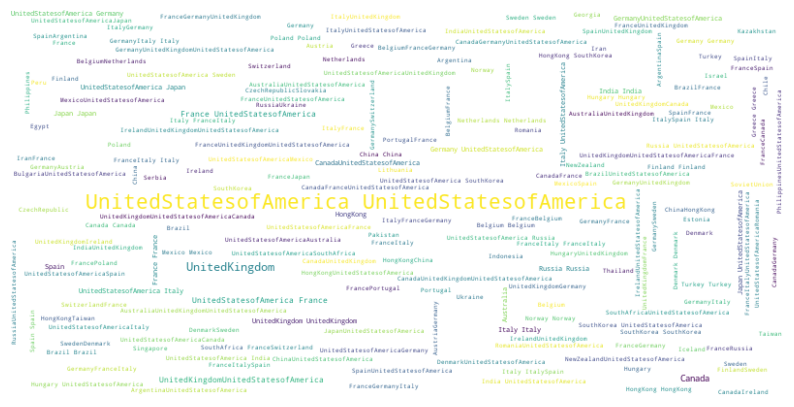

In [16]:
# Se convierten los valores de la columna directors de listas a cadenas de texto
pais = df_sr['country'].apply(lambda x: ' '.join(x))

# Se elimina espacios, guines y puntos entre el nombre y el apellido para que se consideren una sola palabra en la nube de palabras
pais = pais.str.replace(' ','')
pais = pais.str.replace('-','')
pais = pais.str.replace('.','')

# Concatena todos los textos en un solo string
text = ' '.join(pais)

# Crea una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualiza la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()